# ECS7006 Music Informatics - Lab 1 - Suggested solutions

## Exercise 1

Add audio files for playback

In [1]:
import os
import IPython.display as ipd

ipd.display(ipd.Audio(os.path.join('MAPS_ISOL_NO_F_S0_M28_AkPnBcht.wav')))
ipd.display(ipd.Audio(os.path.join('MAPS_ISOL_NO_F_S1_M80_AkPnBcht.wav')))

Load audio files and plot waveforms

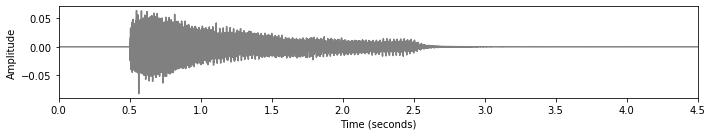

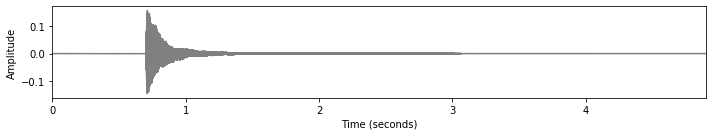

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import librosa

x1, sr1 = librosa.load(os.path.join('MAPS_ISOL_NO_F_S0_M28_AkPnBcht.wav'))
x2, sr2 = librosa.load(os.path.join('MAPS_ISOL_NO_F_S1_M80_AkPnBcht.wav'))

# Plot first audio recording
t1 = np.arange(x1.shape[0]) / sr1
plt.figure(figsize=(10, 2))
plt.plot(t1, x1, color='gray')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim([t1[0], t1[-1]])
plt.tight_layout()

# Plot second audio recording
t2 = np.arange(x2.shape[0]) / sr2
plt.figure(figsize=(10, 2))
plt.plot(t2, x2, color='gray')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim([t2[0], t2[-1]])
plt.tight_layout()

## Exercise 2

Computing the zero-crossing rate:

In [4]:
def zcr(x):
    temp_zcr = np.absolute(np.sign(x[1:]) - np.sign(x[:-1]))
    return (1/(2*len(x)))*np.sum(temp_zcr)

print(zcr(x1[sr1:2*sr1]))
print(zcr(x2[sr2:2*sr2]))

0.02702947845804989
0.0980498866213152


The higher ZCR for the 2nd signal indicates the smaller period / higher pitch.

## Exercise 3

We know that:
\begin{equation}
  F_{pitch} = 2^{(p-69)/12}\cdot440 \nonumber
\end{equation}
Therefore, we can compute MIDI pitch as:
\begin{equation}
  p = 12\cdot\log_{2}(F_{pitch}/440)+69
\end{equation}

In [5]:
import math

def freq2MIDI(freq):
    return round(12* math.log(freq/440,2) + 69)

print(freq2MIDI(261.626))
print(freq2MIDI(880))

60
81


## Exercise 4

Loading and plotting the MIDI file as a piano-roll:

[Note(start=0.250000, end=0.500000, pitch=55, velocity=113),
 Note(start=0.250000, end=0.500000, pitch=67, velocity=113),
 Note(start=0.250000, end=0.500000, pitch=43, velocity=113),
 Note(start=0.500000, end=0.750000, pitch=55, velocity=113),
 Note(start=0.500000, end=0.750000, pitch=67, velocity=113),
 Note(start=0.500000, end=0.750000, pitch=43, velocity=113),
 Note(start=0.750000, end=1.000000, pitch=55, velocity=113),
 Note(start=0.750000, end=1.000000, pitch=67, velocity=113),
 Note(start=0.750000, end=1.000000, pitch=43, velocity=113),
 Note(start=1.000000, end=2.500000, pitch=63, velocity=111),
 Note(start=1.000000, end=2.500000, pitch=39, velocity=127),
 Note(start=1.000000, end=2.500000, pitch=51, velocity=127),
 Note(start=2.750000, end=3.000000, pitch=53, velocity=113),
 Note(start=2.750000, end=3.000000, pitch=65, velocity=113),
 Note(start=2.750000, end=3.000000, pitch=41, velocity=112),
 Note(start=3.000000, end=3.250000, pitch=53, velocity=113),
 Note(start=3.000000, en

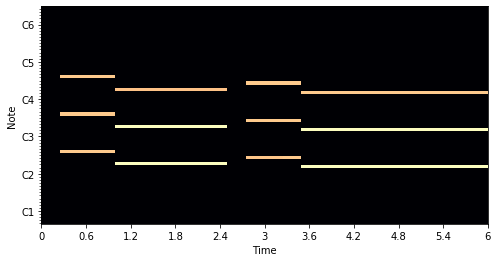

In [6]:
import pretty_midi
import librosa.display

# Load MIDI file
pm = pretty_midi.PrettyMIDI('motif.mid')

# Function for plotting a piano-roll (from pretty_midi tutorial)
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

# Plot piano roll and display list of notes    
plt.figure(figsize=(8, 4))
plot_piano_roll(pm, 20, 90)
pm.instruments[0].notes

Transposing one octave up and deleting the first three notes:

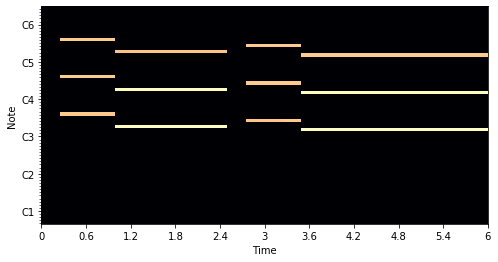

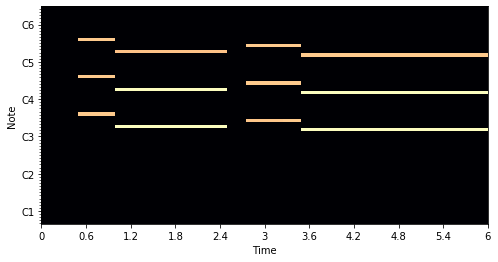

In [7]:
# Transpose one octave up
for instrument in pm.instruments:
    for note in instrument.notes:
        note.pitch += 12

# Plot piano-roll        
plt.figure(figsize=(8, 4))
plot_piano_roll(pm, 20, 90)     

# Remove the first three note events and plot piano-roll again
del pm.instruments[0].notes[0:3]
plt.figure(figsize=(8, 4))
plot_piano_roll(pm, 20, 90)